<a href="https://colab.research.google.com/github/KevinDinh03/Data-Projects/blob/main/Forex_Analysis_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center'>
  <font size='8'>FOREX ANALYSIS DASHBOARD</font>
</div>









<font color='green' size='6'> 1. Project vision and steps






<font color='red' size='5'> Project vision </font>
- For this project, I will be looking at the overall landscape of the three currency pairs' exchange rates EUR/USD, EUR/GBP and GBP/JPY from 2008 to 2024. The vision of the project is to provide traders, investors and analysts a comprehensive understanding of the Foreign Exchange markets of these three common currency pairs. By providing visualisations, insights and analytical interpretations, it can help traders and investors to come up with better decisions, improve their risk managements and increase the profitability of their own strategy. The project aims to provide a valuable resource for especially swing traders or long-term investors.

- The main questions that I are going to answer in this project are:

1.   How does each of the currency pairs flunctuates throughout the years?
2.   What are the relationships between currency pairs?
3.   How strong does each of the currency pairs flunctuate?

<font color='red' size='5'> Project steps </font>
- There are 3 main steps in this project:

1.   **Data pre-processing and clean up**: This includes reading the CSV files, manipulate the structure of the dataset and make sure that the datas are in the correct format for analysing with no null values.

2.   **Visualisation and analytical interpretations**: Turn the dataset into intuitive visualtions and provide analytical interpretations based on those visualised patterns and numbers.

3.   **Conclusion**: Through insights that have been provided from each sub-sections, I will draw our conclusions of what I can do with those valuable resources, what are the limitations and what can be done more to improve this project.




<font color='green' size='6'> 2. Datasets</font>




The datasets in this project are daily exchange rates level of three currency pairs EUR/USD, EUR/GBP and GBP/JPY from 2018 to 2024. The variables that are in the dataset are:


1.   **Time:** Day and time of the recorded variables
2.   **Open:** Open price of the day
3.   **High:** Highest price of the day
4.   **Low:** Lowest price of the day
5.   **Close:** Close price of the day
6.   **Volume:** Amount of transactions of the day



<font color='green' size='6'> 3. Data processing and analysis </font>

<font color='red' size='5'> Data pre-processing and clean up </font>

Firstly, I will access the data in google drive and read CSV files of the three datasets. We use the Google Drive module to mounted the specific Drive account that contains the three datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After successfully mounted the Drive, I will read the CSV files of the three datasets. I will be using Pandas library for this function.

In [2]:
import pandas as pd

eurusd = pd.read_csv('/content/drive/MyDrive/dataset/EURUSD1440.csv', delimiter='\t')
eurgbp = pd.read_csv('/content/drive/MyDrive/dataset/EURGBP1440.csv', delimiter='\t')
gbpjpy = pd.read_csv('/content/drive/MyDrive/dataset/GBPJPY1440.csv', delimiter='\t')

In [3]:
print (eurusd)

      2008-02-04 00:00  1.48348  1.48434  1.47968  1.48243  593799
0     2008-02-05 00:00  1.48232  1.48314  1.46185  1.46334  867880
1     2008-02-06 00:00  1.46316  1.46699  1.45877  1.46114  868265
2     2008-02-07 00:00  1.46119  1.46513  1.44366  1.44742  863686
3     2008-02-08 00:00  1.44737  1.45475  1.44467  1.45030  845793
4     2008-02-10 00:00  1.45127  1.45279  1.45076  1.45234   22293
...                ...      ...      ...      ...      ...     ...
5008  2024-02-08 00:00  1.07754  1.07889  1.07416  1.07776  255931
5009  2024-02-09 00:00  1.07775  1.07951  1.07621  1.07821  262267
5010  2024-02-11 00:00  1.07767  1.07983  1.07766  1.07979   12133
5011  2024-02-12 00:00  1.07980  1.08055  1.07559  1.07717  197303
5012  2024-02-13 00:00  1.07718  1.07744  1.07621  1.07642   12768

[5013 rows x 6 columns]


After reading the CSV files, we can see that the datasets' columns are unlabeled. So i have to add column names for later analysis. I have to reference the preview datasets from the data source for the correct column names. So I use Pandas to turn the three datasets into DataFrame for adding column names and for later manipulation of the data structure.

In [4]:
Column_names=['Time', 'Open', 'High', 'Low', 'Close', 'Volume']


df = pd.DataFrame(eurusd)
df2 = pd.DataFrame(eurgbp)
df3 = pd.DataFrame(gbpjpy)



df.columns = Column_names
df2.columns = Column_names
df3.columns = Column_names



I clean up rows of data that contains null value for data consistency.

In [5]:
df.dropna()
df2.dropna()
df3.dropna()

,Time,Open,High,Low,Close,Volume
0,2008-02-05 00:00,210.690,212.105,208.835,209.275,238114
1,2008-02-06 00:00,209.275,209.675,207.750,208.495,454725
2,2008-02-07 00:00,208.495,209.385,205.885,208.385,261127
3,2008-02-08 00:00,208.385,209.910,208.055,208.740,262789
4,2008-02-10 00:00,208.795,209.496,208.785,209.130,16719
...,...,...,...,...,...,...
5006,2024-02-08 00:00,186.979,188.479,186.863,188.368,173691
5007,2024-02-09 00:00,188.372,188.859,188.220,188.485,146231
5008,2024-02-11 00:00,188.294,188.544,188.256,188.508,6283
5009,2024-02-12 00:00,188.508,188.715,187.846,188.643,123472


Here, I convert the 'Time' column in the dataframe into datetime format for time-based processes and also adding an extra column of 'Daily_Return', which contains the percentage change every day based on the close price of each currency pairs for more usefull analysis and insights later in the project.

In [6]:
df['Time']=pd.to_datetime(df['Time'])
df['Daily_Return'] = df['Close'].pct_change()

df2['Time']=pd.to_datetime(df2['Time'])
df2['Daily_Return']= df2['Close'].pct_change()

df3['Time']=pd.to_datetime(df3['Time'])
df3['Daily_Return']= df3['Close'].pct_change()

<font color='red' size='5'> Data visualisation and analysis </font>

<font color='purple' size='4'> Investigate the movements of exchange rates through interactive dashboard </font>

For this step, I visualise the movement of exchange rates of three currency pairs EUR/USD, EUR/GBP and GBP/JPY with an interactive dashboards.



I use Plotly to create a figure with 6 subplots. Every two subplots will be the visualisation for a currency pair's movements. Each currency pairs will have one line plot that shows the movement of closed prices every day and one bar plot that shows the percentage change daily from 2008 and 2024. I make sure the bars in the bar plot for percentage change are in red when it is negative, and green for positive so that bearish and bullish movements can be shown more clearly to traders and investors.  Then I make sure the format of the plot are pleasant to the eyes, with full annotations and legends shown.

In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create Plotly figure with subplots
fig = make_subplots(rows=6, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=df['Time'], y=df['Close'], mode='lines', name='EUR/USD'), row=1, col=1)
colors_df = ['green' if x >= 0 else 'red' for x in df['Daily_Return']]
fig.add_trace(go.Bar(x=df['Time'], y=df['Daily_Return'], name='Daily Returns', marker_color=colors_df), row=2, col=1)

fig.add_trace(go.Scatter(x=df2['Time'], y=df2['Close'],mode='lines', name='EUR/GBP'), row=3, col=1)
colors_df2 = ['green' if x >= 0 else 'red' for x in df2['Daily_Return']]
fig.add_trace(go.Bar(x=df2['Time'], y=df['Daily_Return'], name='Daily Returns', marker_color=colors_df2), row=4, col=1)

fig.add_trace(go.Scatter(x=df3['Time'], y=df3['Close'],mode='lines', name='GBP/JPY'), row=5, col=1)
colors_df3 = ['green' if x >= 0 else 'red' for x in df3['Daily_Return']]
fig.add_trace(go.Bar(x=df3['Time'], y=df3['Daily_Return'], name='Daily Returns', marker_color=colors_df3), row=6, col=1)

# Update y-axis titles for each subplot
for i in range(1, 7):
    fig.update_yaxes(title_text="Price" if i % 2 != 0 else "Daily Returns", row=i, col=1)

fig.update_xaxes(title_text="Date", row=6, col=1)

# Update layout with larger height and width
fig.update_layout(
    title='Forex Data Analysis Dashboard',
    title_x=0.5,
    height=1000,
    width=1000,
    showlegend=True,
)

# Save the figure as an image
fig.show()

Here I install the Kaleido engines. It serves for the purpose of uploading the image of the Plotly interactive dashboard on Github because the Plotly interactive dashboard will not show up on Github.

In [8]:
!pip install -U kaleido

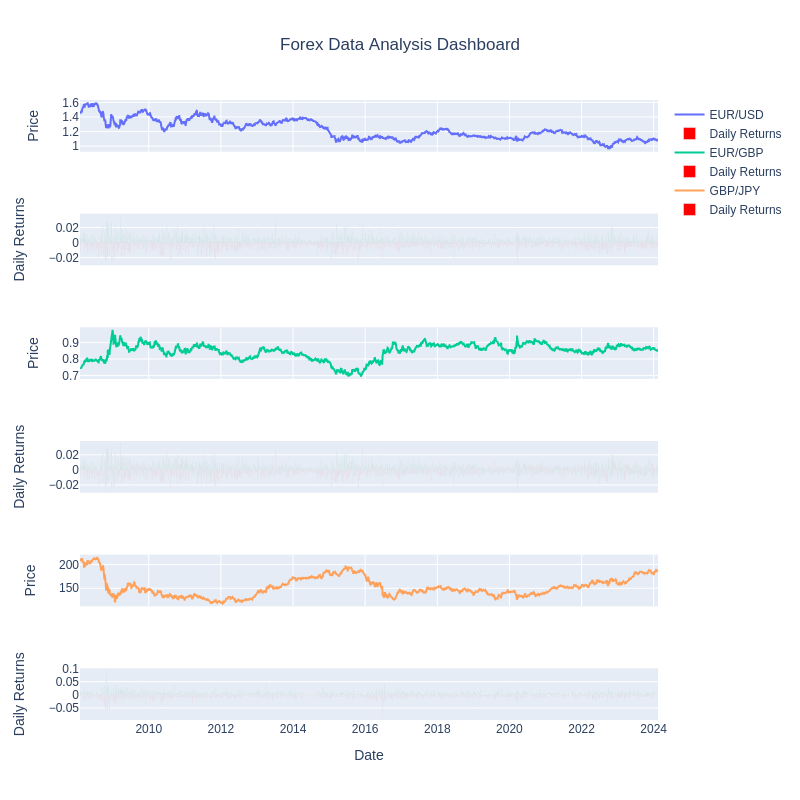

In [9]:
from IPython.display import Image
img= fig.to_image(format="png", width=800, height=800, scale=1)
Image(img)

At this section, I extract the min and max value of closed price for each currency pairs for resources for the interpretations.

In [10]:
# Find index of the value in the 'Close' column
df_high_index = df['Close'].idxmax()
df_low_index = df['Close'].idxmin()

df2_high_index = df2['Close'].idxmax()
df2_low_index = df2['Close'].idxmin()

df3_high_index = df3['Close'].idxmax()
df3_low_index = df3['Close'].idxmin()


# Retrieve the dates and values directly using the indices
df_lowest_date = df.at[df_low_index, 'Time']
df_highest_date = df.at[df_high_index, 'Time']

df2_lowest_date = df2.at[df2_low_index, 'Time']
df2_highest_date = df2.at[df2_high_index, 'Time']

df3_lowest_date = df3.at[df3_low_index, 'Time']
df3_highest_date = df3.at[df3_high_index, 'Time']


df_high = df['Close'].max()
df_low = df['Close'].min()

df2_high = df2['Close'].max()
df2_low = df2['Close'].min()

df3_high = df3['Close'].max()
df3_low = df3['Close'].min()


print("EUR/USD lowest close date:", df_lowest_date, "close value:", df_low)
print("EUR/USD highest close date:", df_highest_date, "close value:", df_high, "\n")

print("EUR/GBP lowest close date:", df2_lowest_date, "close value:", df2_low)
print("EUR/GBP highest close date:", df2_highest_date, "close value:", df2_high,"\n")

print("GBP/JPY lowest close date:", df3_lowest_date, "close value:", df3_low)
print("GBP/JPY highest close date:", df3_highest_date, "close value:", df3_high,"\n")

EUR/USD lowest close date: 2022-09-27 00:00:00 close value: 0.95953
EUR/USD highest close date: 2008-04-22 00:00:00 close value: 1.59721 

EUR/GBP lowest close date: 2015-07-17 00:00:00 close value: 0.69363
EUR/GBP highest close date: 2008-12-30 00:00:00 close value: 0.9773 

GBP/JPY lowest close date: 2011-09-22 00:00:00 close value: 117.331
GBP/JPY highest close date: 2008-07-23 00:00:00 close value: 215.52 



**Analytical interpretation of the movements of exchange rates through interactive dashboard**

From 2008 to 2024, different currency pairs have shown different flunctuations and stages of their movements.

**EUR/USD:** through the dataset, its highest had been in the early of 2008 when it hit 1.59721 USD, but since then, it has been bearish and has reached its lowest at 0.95953 USD in 2022. In 2024 it just reached to a lower high but overall still bearish

**EUR/GBP:** through the dataset, its highest also had been in the early of 2008 at £0.9773. We can also see a clear periodic pattern, with the cycle of bullish, consolidation and head into bearish within 8 years, with lowest point at £0.69363 in 2015, but then rising up again from 2018 to 2022. Heading to 2024, we might see a bearish market if the pattern is consistent.

**GBP/JPY:** its highest peak is at ¥215.52, but then follow up with a hard downfall at the start of the second quarter of 2008. This signify a severe recession at that time. Although the Pound slowly recovered after that, the downtrend still continues and it reaches its lowest in 2011 at ¥117.331 before gradually recovered. From 2008 till 2024, the market has shown some strong flunctuations, especially when coming to the downside which shows some high volatility. Even though heading to 2024 might be a bullish market, due to its high volatility it is very hard to predict what will be next. But throughout the patterns that have been shown, after a bullish market, there might be a big downtrend which can be a possibility for 2024.

<font color='purple' size='4'> Investigate the relationship between exchange rates  </font>

For this part, i firstly concatenates the closing price ('Close') columns from three DataFrames (df, df2, df3) along the 'Time' index into a single DataFrame.
Then, I calculate the correlation matrix using the combined DataFrame. Lastly, i visualise the correlation through a heatmap that is visualised using Seaborn and Matplotlib.

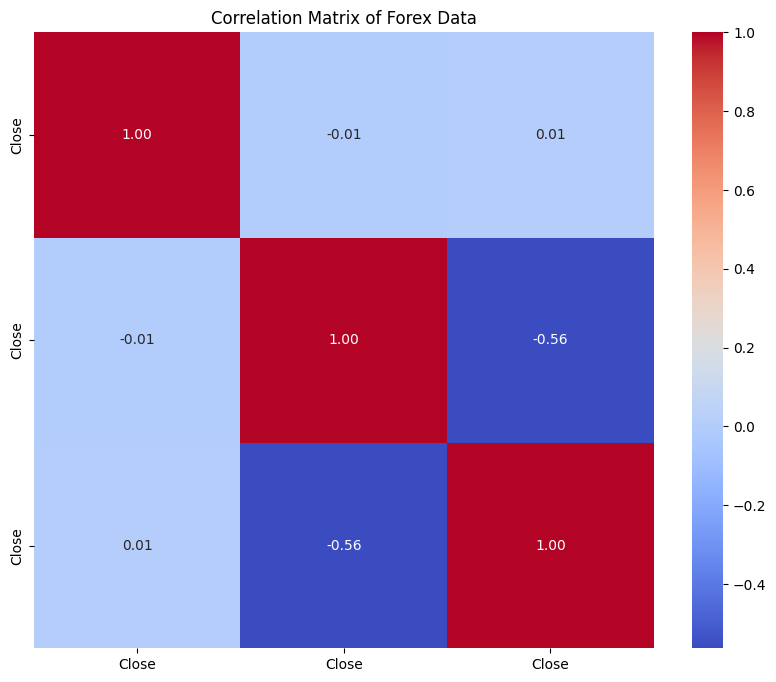

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate all datasets along the Date index
combined_data = pd.concat([df.set_index('Time')['Close'], df2.set_index('Time')['Close'], df3.set_index('Time')['Close']], axis=1)

# Calculate correlation matrix
correlation_matrix = combined_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Forex Data')
plt.show()

**Analytical interpretation of the relationship between exchange rates**

The Correlation Matrix of Forex Data will show us how strong the relationships of one exchange rates to another.We can see that among the three pairs EUR/USD, EUR/GBP and GBP/JPY, EUR/USD has little to no correlation to the rest of the pairs with only -0.01 and 0.01. With EUR/GBP and GPB/JPY, the correlation between them is -0.56, which signifies a moderate negative correlation between the two exchange rate, if ones tends to increase, the other will go with the opposite way. This means that the two exchange rates do have some relationship with each other but not significant

<font color='purple' size='4'> Investigate the volatility between exchange rates  </font>

To investigate the volatility of the exchange rates, I calculate the standard deviation of 'Daily_Returns' for each of the currency pairs. The standard deviation will show the average of variables dispersion from the means, therefore will show how strong the flunctuation of each currency pairs is. Also, I calculate the average volume traded per day for each currency to see if it affects the volatility of the exchange rates.

Volatility (Standard Deviation):
EUR/USD: 0.005360389177843056
EUR/GBP: 0.004855943880772903
GBP/JPY: 0.0075563770107835975
Average volume:
EUR/USD: 237968.052663076
EUR/GBP: 206838.17617717478
GBP/JPY: 183780.05228497306


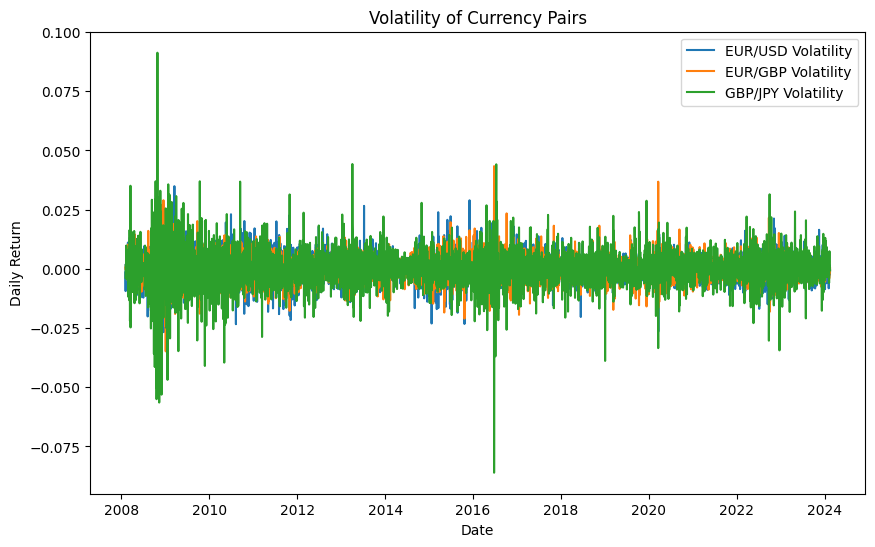

In [12]:

eurusd_volatility = df['Daily_Return'].std()
eurgbp_volatility = df2['Daily_Return'].std()
gbpjpy_volatility = df3['Daily_Return'].std()

eurusd_avg = df['Volume'].mean()
eurgbp_avg = df2['Volume'].mean()
gbpjpy_avg = df3['Volume'].mean()


print("Volatility (Standard Deviation):")
print("EUR/USD:", eurusd_volatility)
print("EUR/GBP:", eurgbp_volatility)
print("GBP/JPY:", gbpjpy_volatility)

print("Average volume:")
print("EUR/USD:", eurusd_avg)
print("EUR/GBP:", eurgbp_avg)
print("GBP/JPY:", gbpjpy_avg)

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Daily_Return'], label='EUR/USD Volatility')
plt.plot(df2['Time'], df2['Daily_Return'], label='EUR/GBP Volatility')
plt.plot(df3['Time'], df3['Daily_Return'], label='GBP/JPY Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Volatility of Currency Pairs')
plt.legend()
plt.show()

**Analytical interpretation of the volatility between exchange rates**

Through the plot of Volatility of Currency Pairs, we can see clearly how different exchange rates flunctuates. The standard deviation will show us how far the rates are deviate from the mean exchange rate. Thoughout the three currency pairs, GBP/JPY is the most volatile, with the highest standard deviation of 0.0075563770107835975, whereas EUR/GBP has the least volatility with the lowest standard deviation of 0.004855943880772903. Therefore, the most stable rates out of the three is EUR/GBP, whereas the ones the has the strongest flunctuations is GBP/JPY.

But contrary to the volatility, GBP/JPY has the lowest average volume of units traded among the three currency pairs which is 183780.05228497306 units per day. While EUR/USD has the most unit traded out of the three pair, which is 237968.052663076 units per day.  

<font color='green' size='6'> 4. Conclusion </font>

<font color='red' size='5'> What can be concluded through the analysis?  </font>

Though the analysis of movements, correlations and volatility, we can conclude with some key points that can be beneficial in trading and investing.

**Movement:** all of the currency pairs have its own periodic movement with the same patterns repeated every time. By looking at different stages of the price movement, we can predict what might come next. But more importantly, the movement of the price has signified that it has been driven by huge events which have been explained by strong flunctuations that have been shown in the analysis. This has shown the importance of fundamental analysis when it comes to investing and trading.

**Correlation:** These three pairs are good for investing and trading because their correlations are not strong which can help traders and investors to diversify the total risk in their portfolio, increasing the profitability of their strategy.

**Volatility:** Through the analysis of volatility, we can conclude that the volume of unit traded does not affect the volatility of the market because as for GBP/JPY, it has the lowest average volumn while holds the highest standard deviation. It can be indicated that volatility might be affected by different factors such as economic events, rather than the price actions created by supply and demand in the market. EUR/GBP has more volume than GBP/JPY and yet, it is the most stable currency pairs out of the three. It can show traders and investors the importance of analysing the macro economy, which is the main factor that drives price. Also by knowing which pairs is more volatile, investors and traders can adjust their risk management or their strategies to fit with the specific pair.

<font color='red' size='5'> Limitations and what can be done more? </font>

The datasets are fully price movements which are limited because I can not investigate deeper into other factors that had affected those flunctuations. Throughout the analysis, it has been shown that volumes of currency units that are being traded in the market doesn't affect the volatility which leads to a high probability that it has been affected by other events that relate to the economy or maybe politics.
So if I can find more datas that relate to those events, i will dive deeper into the correlation of those events to the price movements to see if the assumptions in this project is correct.